In [3]:
# Import the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
file_path = Path('lending_data.csv')
lending_data = pd.read_csv(file_path)

# Review the DataFrame
lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [19]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_data['loan_status']

# Separate the X variable, the features
X = lending_data.drop(columns=['loan_status'])

In [20]:
# Review the y variable Series
y.head()

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [21]:
# Review the X variable DataFrame
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [22]:
# Import the train_test_learn module
# from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

In [23]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [24]:
# Import the LogisticRegression module from SKLearn
# from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
log_reg = LogisticRegression(random_state=1)

# Fit the model using training data
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [25]:
# Make a prediction using the testing data
y_pred = log_reg.predict(X_test_scaled)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [27]:
# Generate a confusion matrix for the model
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [28]:
# Print the classification report for the model
print(f"Accuracy Score: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Accuracy Score: 0.99

Confusion Matrix:
 [[18669    90]
 [   12   613]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     18759
           1       0.87      0.98      0.92       625

    accuracy                           0.99     19384
   macro avg       0.94      0.99      0.96     19384
weighted avg       1.00      0.99      0.99     19384



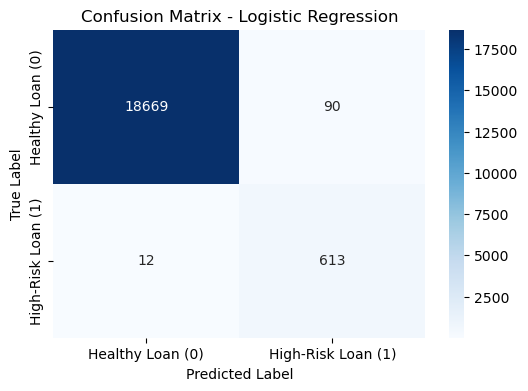

In [29]:
# Visualizing the Confusion Matrix as a Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy Loan (0)", "High-Risk Loan (1)"],
            yticklabels=["Healthy Loan (0)", "High-Risk Loan (1)"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

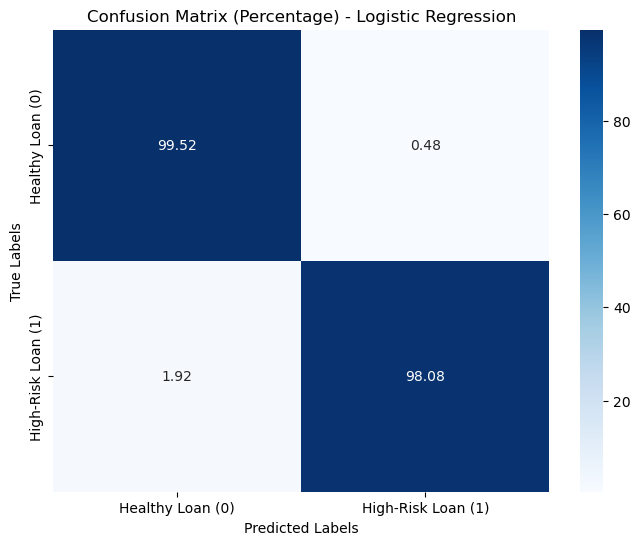

In [31]:
#Convert confusion matrix in percentage

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Create the heatmap for percentage-based confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percentage, 
            annot=True, fmt=".2f",  # Show percentages with two decimal places
            cmap='Blues', 
            xticklabels=["Healthy Loan (0)", "High-Risk Loan (1)"], 
            yticklabels=["Healthy Loan (0)", "High-Risk Loan (1)"])

# Improve labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Percentage) - Logistic Regression')
plt.show()

### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The accuracy score is 0.99 means the model is correctly classifying loans 99% of the time.

* 18669 Healthy loans were correctly classified - (99.52%)
* 613 High-risk loans were correctly classified - (98.08%)
* 90 Healthy loans were wrongly classified as high-risk(False Positives) - (0.48%)
* 12 High-risk loans were misclassified as healthy (False Negative) - (1.92%)


---